# Process Census Data

Load the raw Australian Beureau of Statistics (ABS) Census data and process it into a format that can be used for analysis. 

We use the 'SA1' geography, which is similar to LSOA in the UK.

In [1]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

boundary_dir = os.path.join("..", "..", "Data", "Boundary_Data")
census_dir = os.path.join("..", "..", "Data", "Census_Data")


## Read boundary data 

Read the following SA1 shapefiles:

  - 2011: [SA1_2011_AUST.shp](https://data.gov.au/data/dataset/asgs-2011-edition-boundaries) (_note that the raw data is a large geopackage file, from which I extracted the SA1 shapefile; see below_)
  - 2016: [SA1_2016_AUST.gpkg](https://data.gov.au/data/dataset/asgs-2016-edition-boundaries) (_ditto_)
  - 2021: [SA1_2021_AUST_GDA2020.shp](https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files)
 

### 2021

Just open the shapefile, select inner melbourne, and rename the SA1 code column so that all years are consistent.

In [57]:
sa1_2021 = gpd.read_file(os.path.join(boundary_dir, "SA1_2021_AUST_GDA2020.shp"))
sa1_2021 = sa1_2021.loc[sa1_2021.SA4_NAME21 == "Melbourne - Inner",:]  # Select inner belbourne
sa1_2021 = sa1_2021.rename(columns={"SA1_CODE21": "SA1_Code"})
sa1_2021['SA1_Code'] = pd.to_numeric(sa1_2021['SA1_Code'])
sa1_2021 = sa1_2021.set_index("SA1_Code", drop=True)

In [58]:
sa1_2021.head()

,CHG_FLAG21,CHG_LBL21,SA2_CODE21,SA2_NAME21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
SA1_Code,,,,,,,,,,,,,,,,,
20601110601,0,No change,206011106,Brunswick East,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,0.1801,http://linked.data.gov.au/dataset/asgsed3/SA1/...,"POLYGON ((144.98137 -37.76553, 144.98138 -37.7..."
20601110605,0,No change,206011106,Brunswick East,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,0.0678,http://linked.data.gov.au/dataset/asgsed3/SA1/...,"POLYGON ((144.97139 -37.77338, 144.97151 -37.7..."
20601110606,0,No change,206011106,Brunswick East,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,0.0496,http://linked.data.gov.au/dataset/asgsed3/SA1/...,"POLYGON ((144.97438 -37.77347, 144.97444 -37.7..."
20601110608,0,No change,206011106,Brunswick East,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,0.2623,http://linked.data.gov.au/dataset/asgsed3/SA1/...,"POLYGON ((144.97955 -37.77144, 144.97960 -37.7..."
20601110609,0,No change,206011106,Brunswick East,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,0.1384,http://linked.data.gov.au/dataset/asgsed3/SA1/...,"POLYGON ((144.97220 -37.76876, 144.97231 -37.7..."


### 2016

The raw geopackage is massive and contains loads of different layers. The code below will read the `statistical_area_level_1_2016` layer and save that file. Then the code after that just reads the Melbourne data we need and I haven't saved the whole geopackage permanently.

In [59]:
sa1_2016 = gpd.read_file(os.path.join(boundary_dir, "SA1_2016_AUST.gpkg"))
sa1_2016 = sa1_2016.rename(columns={"SA1_7DIGITCODE_2016": "SA1_Code"})
sa1_2016['SA1_Code'] = pd.to_numeric(sa1_2016['SA1_Code'])
sa1_2016 = sa1_2016.set_index("SA1_Code", drop=True)

In [60]:
sa1_2016.head()

,SA1_MAINCODE_2016,STE_CODE_2016,STE_NAME_2016,geometry
SA1_Code,,,,
2100101,20101100101,2,Victoria,"MULTIPOLYGON (((143.80089 -37.55384, 143.80094..."
2100102,20101100102,2,Victoria,"MULTIPOLYGON (((143.79772 -37.55073, 143.79753..."
2100105,20101100105,2,Victoria,"MULTIPOLYGON (((143.81562 -37.55871, 143.81461..."
2100106,20101100106,2,Victoria,"MULTIPOLYGON (((143.80094 -37.55384, 143.80089..."
2100107,20101100107,2,Victoria,"MULTIPOLYGON (((143.81294 -37.55644, 143.81285..."


### 2011

The raw geopackage is massive and contains loads of different layers. The code below will read the `statistical_area_level_1_2011` layer and save that file. Then the code after that just reads the Melbourne data we need and I haven't saved the whole geopackage permanently.

In [61]:
sa1_2011 = gpd.read_file(os.path.join(boundary_dir, "SA1_2011_AUST.gpkg"))
sa1_2011 = sa1_2011.rename(columns={"SA1_7DIGITCODE_2011": "SA1_Code"})
sa1_2011['SA1_Code'] = pd.to_numeric(sa1_2011['SA1_Code'])
sa1_2011 = sa1_2011.set_index("SA1_Code", drop=True)

In [62]:
sa1_2011.head()

,SA1_MAINCODE_2011,STE_CODE_2011,STE_NAME_2011,geometry
SA1_Code,,,,
2100101,20101100101,2,Victoria,"MULTIPOLYGON (((143.80089 -37.55384, 143.80094..."
2100102,20101100102,2,Victoria,"MULTIPOLYGON (((143.79772 -37.55073, 143.79753..."
2100103,20101100103,2,Victoria,"MULTIPOLYGON (((143.74158 -37.52394, 143.73141..."
2100104,20101100104,2,Victoria,"MULTIPOLYGON (((143.79408 -37.55632, 143.79333..."
2100105,20101100105,2,Victoria,"MULTIPOLYGON (((143.81562 -37.55871, 143.81461..."


### Check three maps

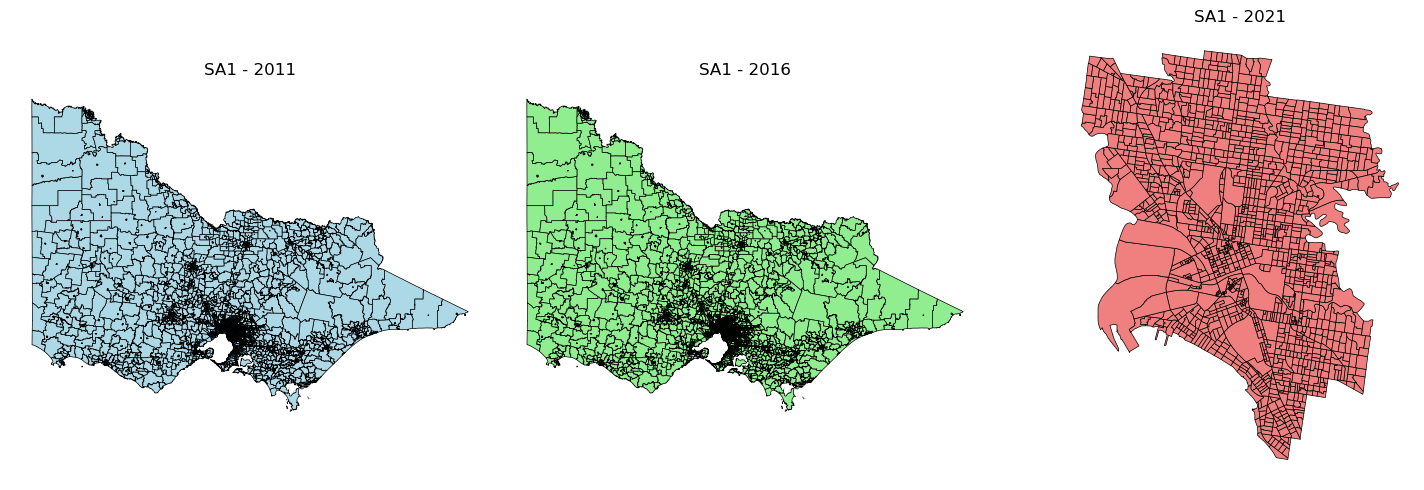

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each map
sa1_2011.plot(ax=axes[0], color="lightblue", edgecolor="black", linewidth=0.5 )
axes[0].set_title("SA1 - 2011")

sa1_2016.plot(ax=axes[1], color="lightgreen", edgecolor="black", linewidth=0.5 )
axes[1].set_title("SA1 - 2016")

sa1_2021.plot(ax=axes[2], color="lightcoral", edgecolor="black", linewidth=0.5 )
axes[2].set_title("SA1 - 2021")

# Remove axes for a cleaner look
for ax in axes:
    ax.set_axis_off()

plt.tight_layout()
plt.show()

## Read Census data and join to the gdfs
Read the following files, all downloaded using the [ABS TableBuilder](https://tablebuilder.abs.gov.au/webapi/jsf/tableView/tableView.xhtml). The data are stored in [Data/Census_Data](../../Data/Census_Data) 

Note that for most files I needed to delete unnecessary rows in the csv file in the top (headers) and bottom (totals). I also sometimes had to slightly adjust the columns as the headers weren't always on the same row, and renamed a couple of longer ones to something more manageable (like the 'SA1 code').

The raw data before any changes are available in [this directory](../../Data/Census_Data/raw).

  - **2011**
    - `2011-InnerMel-Age.csv`: SA1 by Greater Capital City Statistical Areas (UR) by Age in Single Years (AGEP)
    - `2011-InnerMel-Income.csv`: SA1 by Greater Capital City Statistical Areas (UR) by Total Personal Income (weekly) (INCP)
    - `2011-InnerMel-HighestYearOfSchool.csv`: SA1 by Greater Capital City Statistical Areas (UR) by Highest Year of School Completed (HSCP)
  - **2016** 
    - `2016-InnerMel-Age.csv`: SA1 (UR) by AGEP Age
    - `2016-InnerMel-Income.csv`: SA1 (UR) by INCP Total Personal Income (weekly) 
    - `2016-InnerMel-HighestYearOfSchool.csv`: SA1 (UR) by HSCP Highest Year of School Completed
  - **2021** 
    - `2021-InnerMel-Age.csv`: SA1 (UR) by AGEP Age
    - `2021-InnerMel-Income.csv`: SA1 (UR) by INCP Total Personal Income (weekly)
    - `2021-InnerMel-HighestYearOfSchool.csv`: SA1 (UR) by HSCP Highest Year of School Completed

In [64]:
# Define some functions to get a single number out of the census data for age, income and schooling

# AGE 

def calc_mean_age(age_df):
    """Return the mean ages for each row in the DataFrame"""
    ages = np.arange(len(age_df.columns) - 1)  # Array of ages starting from 0
    population_counts = age.iloc[:, 1:]    # Select only age columns
    return (population_counts * ages).sum(axis=1) / population_counts.sum(axis=1)

# INCOME

# Function to extract income range midpoint from column name
def get_midpoint(col_name):
    # Extract the range without anything in parentheses
    base_range = re.search(r'^[^()]+', col_name).group().strip()
    
    # Handle different cases
    if '-' in base_range:
        low, high = [int(x.replace('$', '').replace(',', '')) for x in base_range.split('-')]
        return (low + high) / 2
    elif 'Negative' in base_range or 'Nil' in base_range:
        return 0
    elif 'or more' in base_range:
        low = int(base_range.replace('$', '').replace(',', '').split(' ')[0])
        # No idea what the upper range shoud be
        return low * 2 
    
    return 0  # For 'Not stated' or 'Not applicable'

def calc_mean_income(income_df):
    """Return the mean income for each row in the DataFrame"""
    income_columns = income_df.columns  # The SA code is the index, so all columns relate to 
    midpoints = [get_midpoint(col) for col in income_columns]
    print(midpoints)

    # Calculate the weighted mean income per row
    income_counts = income_df[income_columns].fillna(0)  # Use zero for any missing values in counts
    return (income_counts * midpoints).sum(axis=1) / income_counts.sum(axis=1)
    

# SCHOOL (last year of school finished)
# Map text descriptions to numbers
_year_dict = {
    "Year 12 or equivalent": 12,
    "Year 11 or equivalent": 11,
    "Year 10 or equivalent": 10,
    "Year 9 or equivalent": 9,
    "Year 8 or below": 8,
    "Did not go to school": 7
}
_ages = [_year_dict[col] for col in _year_dict.keys()]

def calc_mean_school_year(school_df):
    """Return the mean year of school completion for each row in the DataFrame"""
    school_counts = school_df[list(_year_dict.keys())]
    return (school_counts * _ages).sum(axis=1) / school_counts.sum(axis=1)
    
    

Read all of the data and join to the spatial data in a loop


In [65]:
for year, gdf in [(2011, sa1_2011), (2016, sa1_2016), (2021, sa1_2021)]:
    age = pd.read_csv(os.path.join(census_dir, f"{year}-InnerMel-Age.csv"))
    income = pd.read_csv(os.path.join(census_dir, f"{year}-InnerMel-Income.csv"))
    school = pd.read_csv(os.path.join(census_dir, f"{year}-InnerMel-HighestYearOfSchool.csv"))
    # Perform some operations on all three:
    for x in [age, income, school]:
        x['SA1_Code'] = pd.to_numeric(x['SA1_Code'])  # Convert to numeric
        x.set_index("SA1_Code", inplace=True)  # Makes joining easier
        del x['Total']  # All of them have a 'total' column that we don't want
        for col in ['Unnamed: 20', 'Unnamed: 16']:
            try:     
                # Some have this column, but not all (ignore exceptions raised if that column doesn't exist)
                del x[col]
            except:
                pass
    assert len(age) == len(income) == len(school)
    #print(f"{year}: {age.shape}, {income.shape}, {school.shape}")
    
    ## Age
    age['mean_age'] = calc_mean_age(age)
    gdf[f'mean_age'] = gdf.join(age)["mean_age"]
    #print(f"{year} age: {len(gdf[gdf.mean_age.notnull()])} / {len(age)} joined.")
    
    
    # Income
    income['mean_income'] = calc_mean_income(income)
    gdf['mean_income'] = gdf.join(income)["mean_income"]
    #print(f"{year} income: {len(gdf[gdf.mean_income.notnull()])} / {len(income)} joined.")

    
    # School
    school['mean_school_year'] = calc_mean_school_year(school)
    gdf['mean_school_year'] = gdf.join(school)["mean_school_year"]
    #print(f"{year} school: {len(gdf[gdf.mean_school_year.notnull()])} / {len(school)} joined.")
    
    
    
    
    
    

2011 age: 1162 / 1194 joined.
[0, 0, 100.0, 249.5, 349.5, 499.5, 699.5, 899.5, 1124.5, 1374.5, 1749.5, 4000, 0, 0]
2011 income: 1165 / 1194 joined.
2011 school: 1163 / 1194 joined.
2016 age: 1202 / 1234 joined.
[0, 0, 75.0, 224.5, 349.5, 449.5, 574.5, 724.5, 899.5, 1124.5, 1374.5, 1624.5, 1874.5, 2499.5, 6000, 0, 0, 0]
2016 income: 1208 / 1234 joined.
2016 school: 1205 / 1234 joined.
2021 age: 1404 / 1436 joined.
[0, 0, 75.0, 224.5, 349.5, 449.5, 574.5, 724.5, 899.5, 1124.5, 1374.5, 1624.5, 1874.5, 2499.5, 3249.5, 7000, 0, 0]
2021 income: 1407 / 1436 joined.
2021 school: 1406 / 1436 joined.


In [11]:
# TODO manually check a couple of the calculations

Map those thre variables across the three years to check they look OK

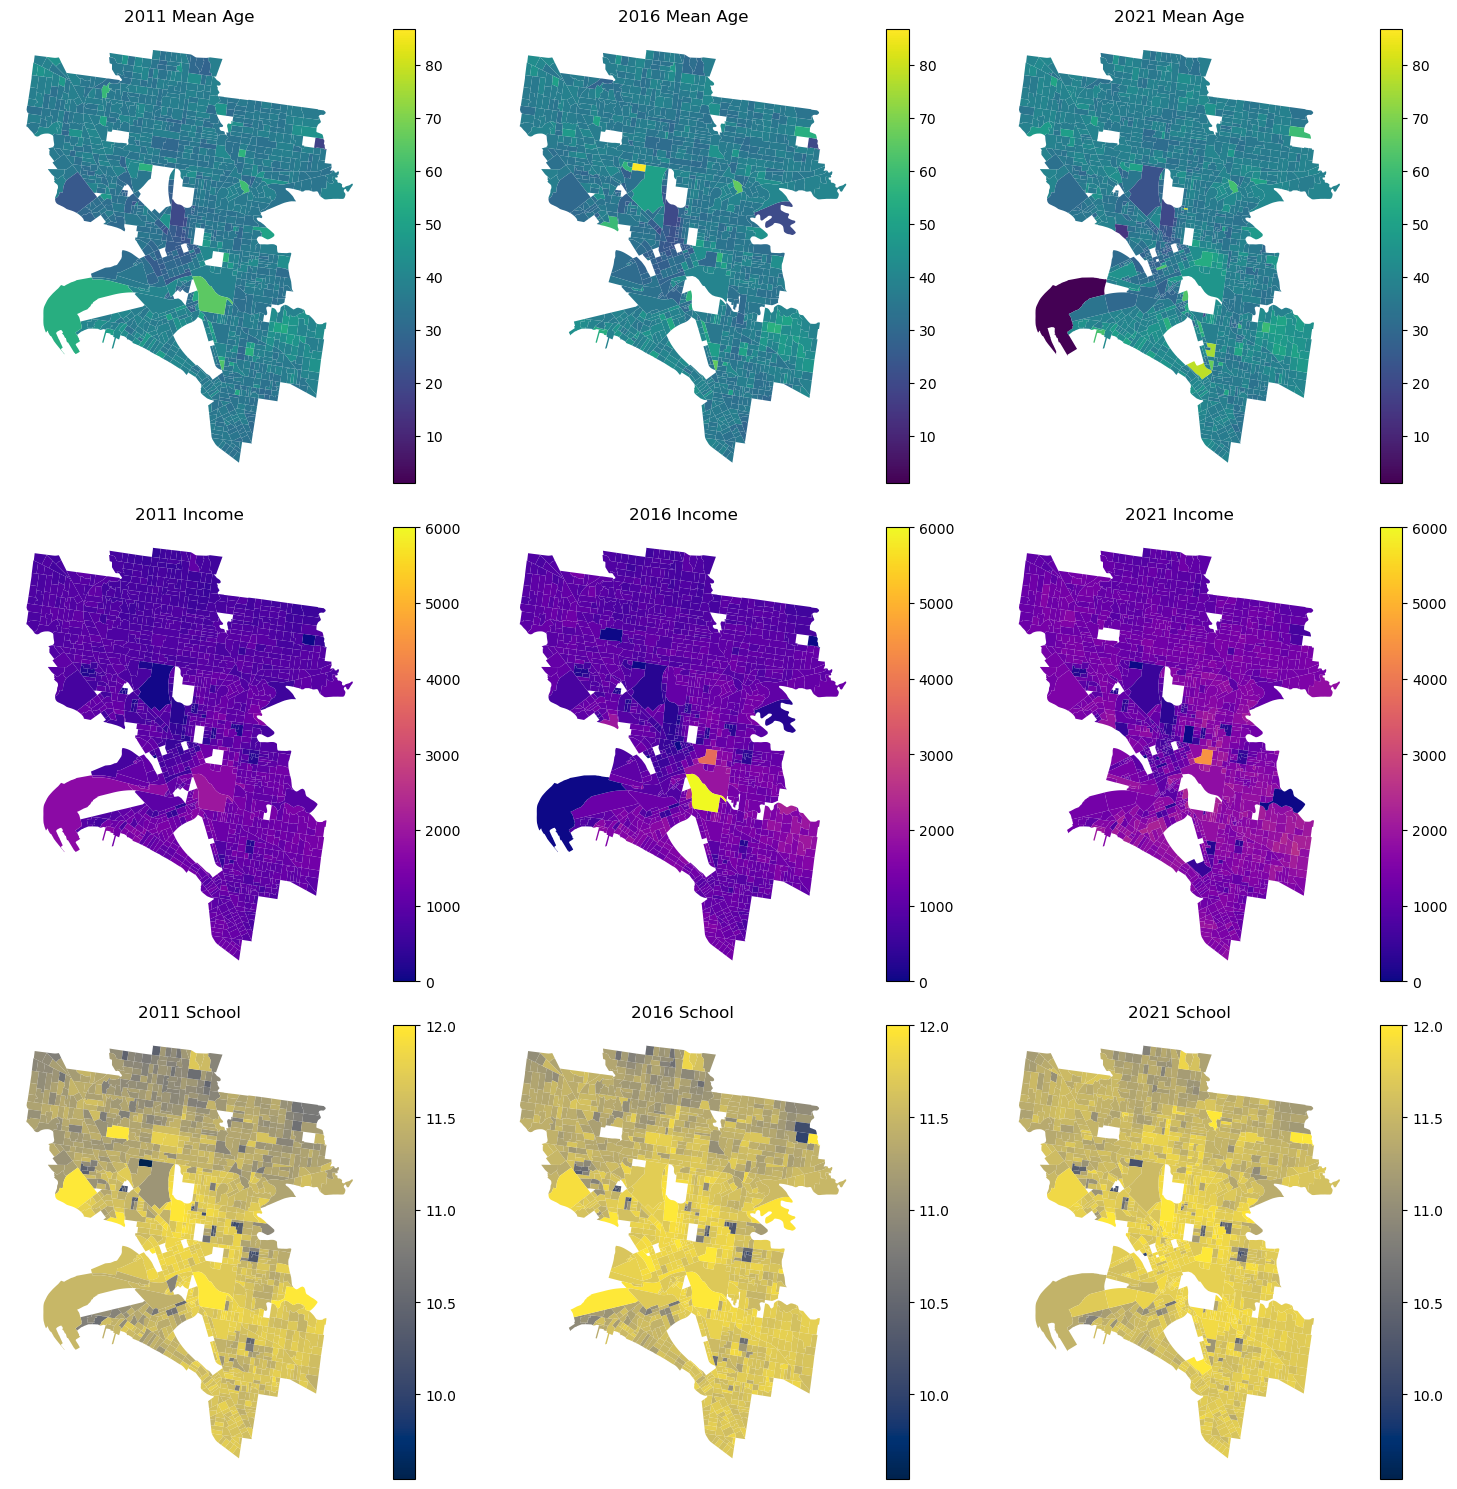

In [73]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Set up a 3x3 grid of plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Determine color scales for each variable across all years
age_vmin, age_vmax = (
    min(sa1_2011['mean_age'].min(), sa1_2016['mean_age'].min(), sa1_2021['mean_age'].min()),
    max(sa1_2011['mean_age'].max(), sa1_2016['mean_age'].max(), sa1_2021['mean_age'].max())
)
income_vmin, income_vmax = (
    min(sa1_2011['mean_income'].min(), sa1_2016['mean_income'].min(), sa1_2021['mean_income'].min()),
    max(sa1_2011['mean_income'].max(), sa1_2016['mean_income'].max(), sa1_2021['mean_income'].max())
)
school_vmin, school_vmax = (
    min(sa1_2011['mean_school_year'].min(), sa1_2016['mean_school_year'].min(), sa1_2021['mean_school_year'].min()),
    max(sa1_2011['mean_school_year'].max(), sa1_2016['mean_school_year'].max(), sa1_2021['mean_school_year'].max())
)

# Plot 'mean_age' for each year with consistent color scale
sa1_2011.plot(column='mean_age', cmap='viridis', legend=True, vmin=age_vmin, vmax=age_vmax, ax=axes[0, 0])
axes[0, 0].set_title('2011 Mean Age')
sa1_2016.plot(column='mean_age', cmap='viridis', legend=True, vmin=age_vmin, vmax=age_vmax, ax=axes[0, 1])
axes[0, 1].set_title('2016 Mean Age')
sa1_2021.plot(column='mean_age', cmap='viridis', legend=True, vmin=age_vmin, vmax=age_vmax, ax=axes[0, 2])
axes[0, 2].set_title('2021 Mean Age')

# Plot 'income' for each year with consistent color scale
sa1_2011.plot(column='mean_income', cmap='plasma', legend=True, vmin=income_vmin, vmax=income_vmax, ax=axes[1, 0])
axes[1, 0].set_title('2011 Income')
sa1_2016.plot(column='mean_income', cmap='plasma', legend=True, vmin=income_vmin, vmax=income_vmax, ax=axes[1, 1])
axes[1, 1].set_title('2016 Income')
sa1_2021.plot(column='mean_income', cmap='plasma', legend=True, vmin=income_vmin, vmax=income_vmax, ax=axes[1, 2])
axes[1, 2].set_title('2021 Income')

# Plot 'school' for each year with consistent color scale
sa1_2011.plot(column='mean_school_year', cmap='cividis', legend=True, vmin=school_vmin, vmax=school_vmax, ax=axes[2, 0])
axes[2, 0].set_title('2011 School')
sa1_2016.plot(column='mean_school_year', cmap='cividis', legend=True, vmin=school_vmin, vmax=school_vmax, ax=axes[2, 1])
axes[2, 1].set_title('2016 School')
sa1_2021.plot(column='mean_school_year', cmap='cividis', legend=True, vmin=school_vmin, vmax=school_vmax, ax=axes[2, 2])
axes[2, 2].set_title('2021 School')

# Hide axes for a cleaner look
for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

## Join the sensors to the census data

In [74]:
XXXX HERE

SyntaxError: invalid syntax (1327516612.py, line 1)